# Прогнозирование оттока клиентов.

# Описание проекта:
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Наша задача — обучить на этих данных модель для прогноза оттока клиентов. В качестве метрики будет использоваться ROC-AUC, его значение должно быть больше 85.

# Описание услуг
Оператор предоставляет два основных типа услуг: <br>
Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно. <br>
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).<br>
Также доступны такие услуги:<br>
Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);<br>
Выделенная линия технической поддержки (TechSupport);<br>
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);<br>
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).<br>
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Описание данных
Данные состоят из нескольких файлов, полученных из разных источников:<br>
contract_new.csv — информация о договоре;<br>
personal_new.csv — персональные данные клиента;<br>
internet_new.csv — информация об интернет-услугах;<br>
phone_new.csv — информация об услугах телефонии.<br>
<br>
Файл contract_new.csv<br>
<br>
customerID — идентификатор абонента;<br>
BeginDate — дата начала действия договора;<br>
EndDate — дата окончания действия договора;<br>
Type — тип оплаты: раз в год-два или ежемесячно;<br>
PaperlessBilling — электронный расчётный лист;<br>
PaymentMethod — тип платежа;<br>
MonthlyCharges — расходы за месяц;<br>
TotalCharges — общие расходы абонента.<br>
<br>
Файл personal_new.csv<br>
<br>
customerID — идентификатор пользователя;<br>
gender — пол;<br>
SeniorCitizen — является ли абонент пенсионером;<br>
Partner — есть ли у абонента супруг или супруга;<br>
Dependents — есть ли у абонента дети.<br>
<br>
Файл internet_new.csv<br>
<br>
customerID — идентификатор пользователя;<br>
InternetService — тип подключения;<br>
OnlineSecurity — блокировка опасных сайтов;<br>
OnlineBackup — облачное хранилище файлов для резервного копирования данных;<br>
DeviceProtection — антивирус;<br>
TechSupport — выделенная линия технической поддержки;<br>
StreamingTV — стриминговое телевидение;<br>
StreamingMovies — каталог фильмов.<br>
<br>
Файл phone_new.csv<br>
<br>
customerID — идентификатор пользователя;<br>
MultipleLines — подключение телефона к нескольким линиям одновременно.<br>
Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

# План работы

1. Загрузка данных:<br>
Загрузим данные и выполним их первичный осмотр.
2. Исследовательский анализ и предобработка данных:<br>
Выполним исследовательский анализ каждого датафрейма и при необходимости выполним предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.
3. Объединение данных:<br>
Объединим выбранные признаки в один датафрейм по ключу.
4. Исследовательский анализ и предобработка данных объединённого датафрейма:<br>
Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполним предобработку. Проведем корреляционный анализ. 
5. Подготовка данных:<br>
Выполним подготовку данных для обучения модели. Разделим данные на две выборки. 
6. Обучение моделей:<br>
Обучим как минимум две модели. 
7. Выбор лучшей модели:<br>
Выберем лучшую модель и проверем её качество на тестовой выборке.
8. Общий вывод и рекомендации заказчику:<br>
Сделаем общий вывод о проделанной работе: опишем основные этапы работы, полученные результаты и дадим рекомендации для бизнеса.

In [28]:
pip install --upgrade pip -q

Note: you may need to restart the kernel to use updated packages.


In [29]:
!pip install phik -q

In [30]:
!pip install scikit-learn==1.3.2 -q

In [31]:
pip install --upgrade scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [32]:
# импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.inspection import permutation_importance
import phik
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, confusion_matrix,roc_curve, auc,
                             accuracy_score, precision_score, recall_score, r2_score, roc_auc_score, make_scorer)
RANDOM_STATE = 40324

# дата выгрузки данных 
day = '2020-02-01'

In [33]:
# функция для вывода уникальных значений
def uniques(data):    
    for i in data.columns:
        print(f'Признак "{i}" имеет {len(data[i].unique())} уникальных значений:')
        print(data[i].unique(), '\n')

## Загрузка данных.

### Загрузим и сохраним таблицу contract.

In [34]:
contract = pd.read_csv('/####.csv')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Взглянем на общую информацию.

In [35]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Необходимо привести названия столбцов к змеиному регистру, поменять тип данных на datetime64 для столбца "begindate", заменим пропуски в столбце "totalcharges" на 0 и привидем его к типу float, так же создадим столбец "target" с целевой переменной на основе столбца "enddate", 0 - клиент остался, 1 - клиент ушел.

In [36]:
contract.columns = contract.columns.str.lower()
contract_columns = {'customerid':'customer_id', 'begindate':'begin_date', 'enddate':'end_date',
                    'paperlessbilling':'paperless_billing', 'paymentmethod':'payment_method',
                   'monthlycharges':'monthly_charges', 'totalcharges':'total_charges'}
contract['begindate'] = pd.to_datetime(contract['begindate'])
contract['target'] = contract['enddate'].apply(lambda x: 0 if x == 'No' else 1)
contract['totalcharges'] = contract['totalcharges'].replace(' ', 0).astype('float')
contract.rename(columns=contract_columns, inplace=True)
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 495.3+ KB


In [37]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0


Проверим наличие полных дубликатов и пропусков.

In [38]:
contract.duplicated().sum()

0

In [39]:
contract.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
target               0
dtype: int64

Данные впорядке.

In [40]:
contract.describe()

,monthly_charges,total_charges,target
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,0.156325
std,30.090047,2112.742814,0.363189
min,18.250000,0.000000,0.000000
25%,35.500000,436.750000,0.000000
50%,70.350000,1343.350000,0.000000
75%,89.850000,3236.690000,0.000000
max,118.750000,9221.380000,1.000000


### Загрузим и сохраним таблицу personal.

In [41]:
personal = pd.read_csv('/####.csv')
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Ознакомимся с общей информацией.

In [42]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Формат данных соотвествует истеному, приведем названия столбцов к змеиному регистру.

In [43]:
personal.columns = personal.columns.str.lower()
personal.rename(columns={'customerid':'customer_id', 'seniorcitizen':'senior_citizen'}, inplace=True)
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [44]:
personal.duplicated().sum()

0

In [45]:
personal.isna().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

Пропусков и дубликатов нет.

### Загрузим и сохраним таблицу internet.

In [46]:
internet = pd.read_csv('/####.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Привидем названия столбцов к змеиному регистру и проверим общую информацию.

In [47]:
internet.columns = internet.columns.str.lower()
internet_columns = {'customerid':'customer_id', 'internetservice':'internet_service', 'onlinesecurity':'online_security',
                   'onlinebackup':'online_backup', 'deviceprotection':'device_protection', 'techsupport':'tech_support',
                   'streamingtv':'streaming_tv', 'streamingmovies': 'streaming_movies'}
internet.rename(columns=internet_columns, inplace=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [48]:
internet.duplicated().sum()

0

In [49]:
internet.isna().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

Прорусков и дубликатов нет, формат данных правильный.

### Загрузим и сохраним таблицу phone.

In [50]:
phone = pd.read_csv('/####.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Так же ознакомимся с таблицей и приведем названия столбцов к змеиному регистру.

In [51]:
phone.columns = phone.columns.str.lower()
phone.rename(columns={'customerid':'customer_id', 'multiplelines':'multiple_lines'}, inplace=True)
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [52]:
phone.duplicated().sum()

0

In [53]:
phone.isna().sum()

customer_id       0
multiple_lines    0
dtype: int64

Пропуски и дубликаты отстутсвуют, формат правильный.

### Вывод по загрузке данных:
1. Во всех таблицах привели названия столбцов к нижнему регистру.
2. Пропуски и дубликаты отсутсвуют.
3. В таблице contract поменяли тип данных на datetime64 для столбца "begindate", заменили пропуски в столбце "totalcharges" на 0 и привели его к типу float, так же создали столбец "target" с целевой переменной на основе столбца "enddate", 0 - клиент остался, 1 - клиент ушел.

## Предобработка.

### Предобработка contract.

Заменим отсутсвующие значения в столбце "end_date" на актуальную дату информации.

In [54]:
contract['end_date'] = contract['end_date'].str.replace('No', day)

In [55]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0


Привидем столбец "enddate" к формату datetime64.

In [56]:
contract['end_date'] = pd.to_datetime(contract['end_date'])

Теперь добавим столбец "duration" с длительностью пользования клиентом услугами компании. Для этого вычтем из столбца "end_date" столбец "begin_date", затем удалим эти столбцы, чтобы избежать проблем при обучении моделей.

In [57]:
contract['duration'] = (contract['end_date'] - contract['begin_date']).dt.components.days
contract = contract.drop(['begin_date','end_date'], axis=1)

In [58]:
contract.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target,duration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


In [59]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   target             7043 non-null   int64  
 7   duration           7043 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


In [60]:
uniques(contract[['type','paperless_billing', 'payment_method', 'target']])

Признак "type" имеет 3 уникальных значений:
['Month-to-month' 'One year' 'Two year'] 

Признак "paperless_billing" имеет 2 уникальных значений:
['Yes' 'No'] 

Признак "payment_method" имеет 4 уникальных значений:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Признак "target" имеет 2 уникальных значений:
[0 1] 



Заменили отсутсвующие значения в столбце "end_date" на актуальную дату. Добавили столбец "duration" с длительностью пользования клиентом услугами компании. Для этого вычли из столбца "end_date" столбец "begin_date", затем удалили эти столбцы, чтобы избежать проблем при обучении моделей. Проверили уникальные значения в категориальных столбцах, все в порядке.

### Предобработка personal.

In [61]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [62]:
personal['senior_citizen'] = personal['senior_citizen'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [63]:
uniques(personal.drop(['customer_id'], axis=1))

Признак "gender" имеет 2 уникальных значений:
['Female' 'Male'] 

Признак "senior_citizen" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "partner" имеет 2 уникальных значений:
['Yes' 'No'] 

Признак "dependents" имеет 2 уникальных значений:
['No' 'Yes'] 



In [64]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,No,Yes,No
1,5575-GNVDE,Male,No,No,No
2,3668-QPYBK,Male,No,No,No
3,7795-CFOCW,Male,No,No,No
4,9237-HQITU,Female,No,No,No


В столбце "senior_citizen" заменили значения 0 и 1 на No и Yes соотвественно, ошибок в уникальных значениях нет.

### Предобработка internet.

In [65]:
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [66]:
uniques(internet.drop(['customer_id'], axis=1))

Признак "internet_service" имеет 2 уникальных значений:
['DSL' 'Fiber optic'] 

Признак "online_security" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "online_backup" имеет 2 уникальных значений:
['Yes' 'No'] 

Признак "device_protection" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "tech_support" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "streaming_tv" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "streaming_movies" имеет 2 уникальных значений:
['No' 'Yes'] 



В таблице internet так же нет ошибок в уникальных значениях.

### Предобработка phone.

In [67]:
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [68]:
uniques(phone.drop(['customer_id'], axis=1))

Признак "multiple_lines" имеет 2 уникальных значений:
['No' 'Yes'] 



С таблицей phone так же все впорядке.

### Вывод по предобработке:
1. Проверили уникальыне значения во всех столбцах всех таблиц, проблем обнаруженно небыло.
2. В таблице contract заменили отсутсвующие значения в столбце "end_date" на актуальную дату информации. Добавили столбец "duration" с длительностью пользования клиентом услугами компании. Для этого вычли из столбца "end_date" столбец "begin_date", затем удалили эти столбцы, чтобы избежать проблем при обучении моделей.
3. В таблице personal в столбце "senior_citizen" заменили значения 0 и 1 на No и Yes соотвественно.

## Объединение таблиц.

Далее необходимо объединить все таблицы в одну.

In [41]:
print(contract.shape)
print(personal.shape)
print(internet.shape)
print(phone.shape)

(7043, 8)
(7043, 5)
(5517, 8)
(6361, 2)


У таблиц contract и personal одинаковый размер, поэтому просто присоединим одну к другой по столбцу "customer_id". Таблицы phone и internet присоединим к полученной, в итоговой таблице будут пропуски т.к. не все клиенты пользуются интернетом или телефоном.

In [69]:
total_data = contract.join(personal.set_index('customer_id'), on='customer_id', how='outer')
print(total_data.shape)
total_data.head()

(7043, 12)


,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target,duration,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,No,Yes,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,No,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,No,No,No


In [70]:
total_data = total_data.join(internet.set_index('customer_id'), on='customer_id', how='left')
total_data = total_data.join(phone.set_index('customer_id'), on='customer_id', how='left')
print(total_data.shape)
total_data.head()

(7043, 20)


,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target,duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


In [71]:
# заполнение пропусков
total_data = total_data.fillna('No_value')

### Вывод по объединению таблиц:
Таблиц contract и personal одинакового размера, поэтому присоединили одну к другой по столбцу "customer_id". Таблицы phone и internet присоединили к полученной. В итоговой таблице появились пропуски т.к. не все клиенты пользуются интернетом или телефоном, заполнили их хначением 'No_value'.

## Исследовательский анализ.

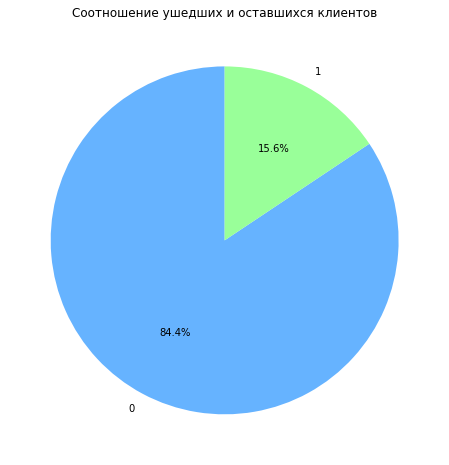

In [45]:
target_counts = total_data['target'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Соотношение ушедших и оставшихся клиентов')
plt.show()

В наших данных 15.6% клиентов рассторгли контракт. Это является значительным дисбалансом, учтем данную информацию при обучении моделей.

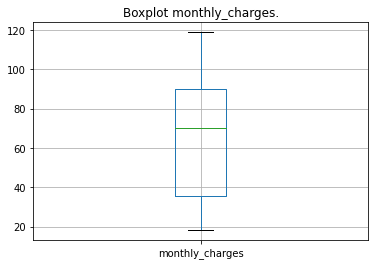

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [72]:
total_data.boxplot(column='monthly_charges')
plt.title('Boxplot monthly_charges.')
plt.show()
total_data['monthly_charges'].describe()

В стобце с рассходами за месяц отсутсвуют выбросы, а большая часть значений лежит в диапазоне от 35.5 до 89.85. Это говорит о том, что у компании нет клиентов с черезвычайно высокими или низкими покупками. 

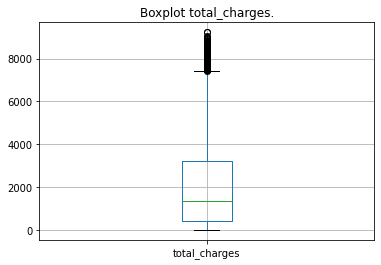

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64

In [73]:
total_data.boxplot(column='total_charges')
plt.title('Boxplot total_charges.')
plt.show()
total_data['total_charges'].describe()

In [74]:
total_data[total_data['total_charges'] == 0]

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target,duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-LVYGI,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,0,Female,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No_value
753,3115-CZMZD,Two year,No,Mailed check,20.25,0.0,0,0,Male,No,No,Yes,No_value,No_value,No_value,No_value,No_value,No_value,No_value,No
936,5709-LVOEQ,Two year,No,Mailed check,80.85,0.0,0,0,Female,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,Two year,No,Mailed check,25.75,0.0,0,0,Male,No,Yes,Yes,No_value,No_value,No_value,No_value,No_value,No_value,No_value,Yes
1340,1371-DWPAZ,Two year,No,Credit card (automatic),56.05,0.0,0,0,Female,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No_value
3331,7644-OMVMY,Two year,No,Mailed check,19.85,0.0,0,0,Male,No,Yes,Yes,No_value,No_value,No_value,No_value,No_value,No_value,No_value,No
3826,3213-VVOLG,Two year,No,Mailed check,25.35,0.0,0,0,Male,No,Yes,Yes,No_value,No_value,No_value,No_value,No_value,No_value,No_value,Yes
4380,2520-SGTTA,Two year,No,Mailed check,20.00,0.0,0,0,Female,No,Yes,Yes,No_value,No_value,No_value,No_value,No_value,No_value,No_value,No
5218,2923-ARZLG,One year,Yes,Mailed check,19.70,0.0,0,0,Male,No,Yes,Yes,No_value,No_value,No_value,No_value,No_value,No_value,No_value,No
6670,4075-WKNIU,Two year,No,Mailed check,73.35,0.0,0,0,Female,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


В столбце с общими тратами мы наблюдаем выбросы в верхней части. Нельзя отнести их к аномалиям, клиенты, которые давно пользуются услугами компании успели потрать значительную сумму на ее услуги. Так же есть клиенты которые только начали пользоваться услугами компании, поэтому их суммарные траты равны нулю.

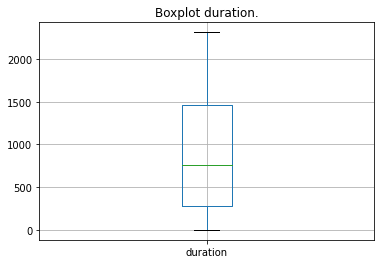

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration, dtype: float64

In [49]:
total_data.boxplot(column='duration')
plt.title('Boxplot duration.')
plt.show()
total_data['duration'].describe()

В столбце с длительностью так же отсутсвуют выбросы, большая часть значений находится в диапозоне от 276 до 1461.

Далее построем гистограммы с указанием класса клиентов - пользуются услугами или уже нет.

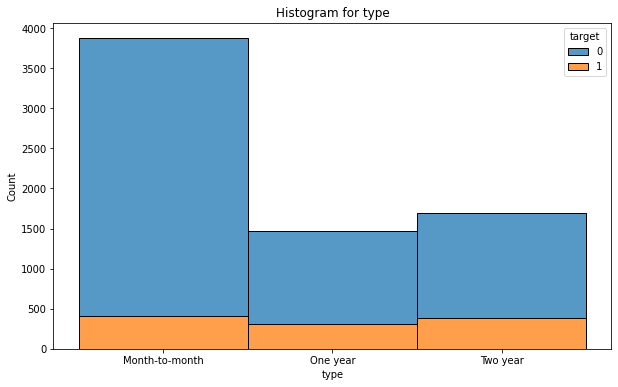

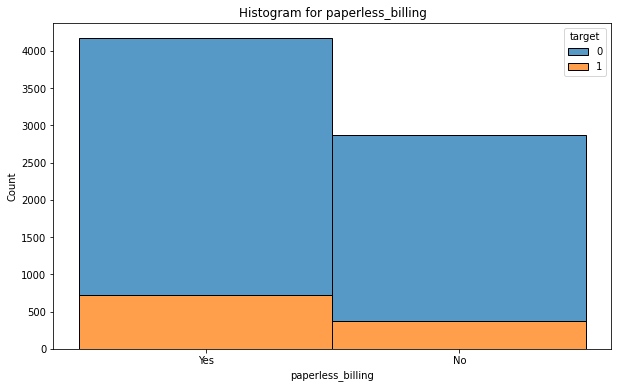

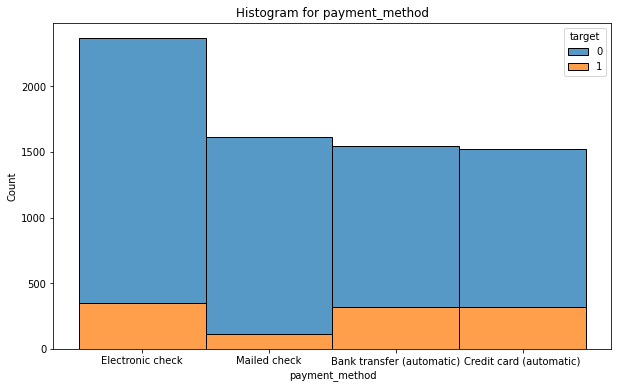

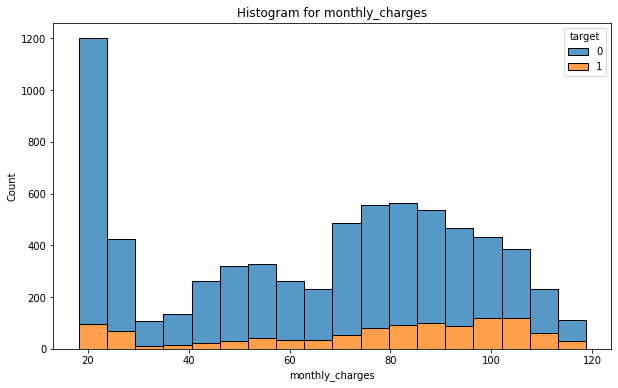

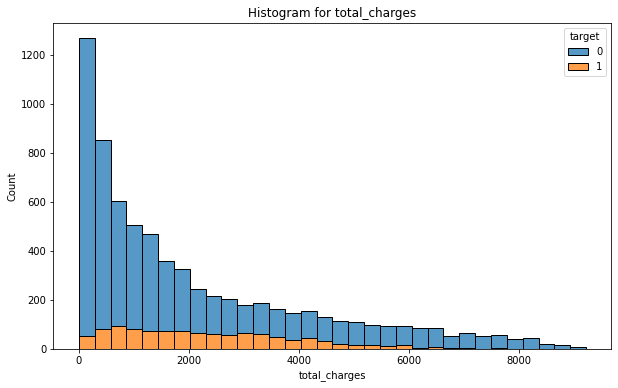

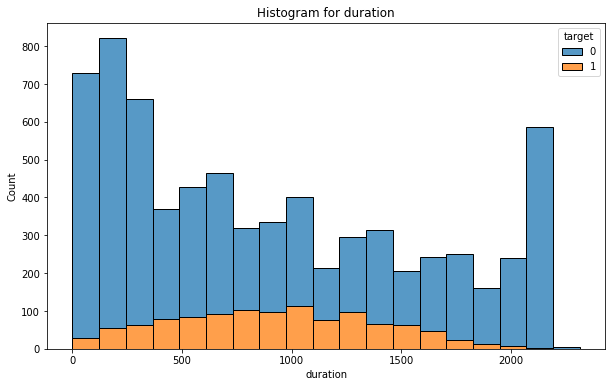

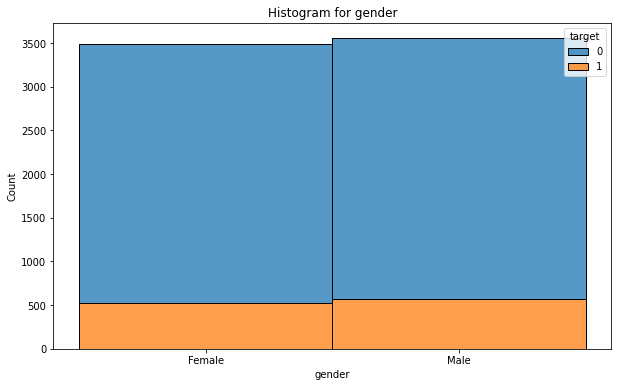

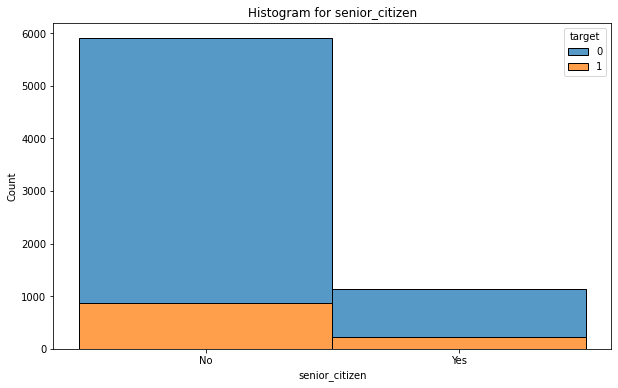

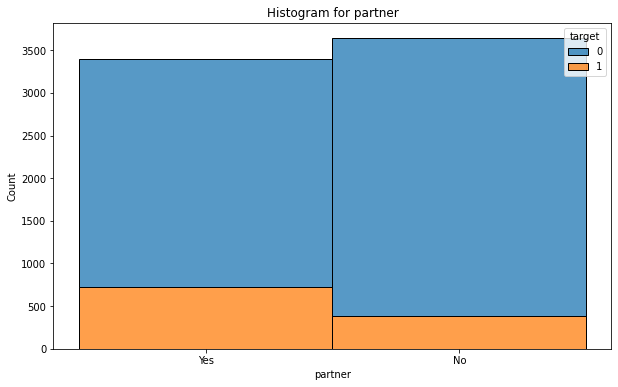

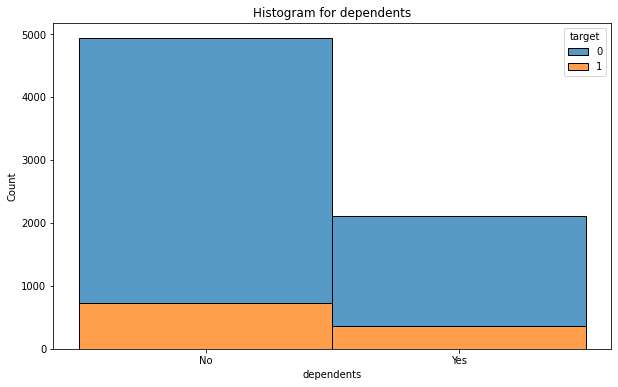

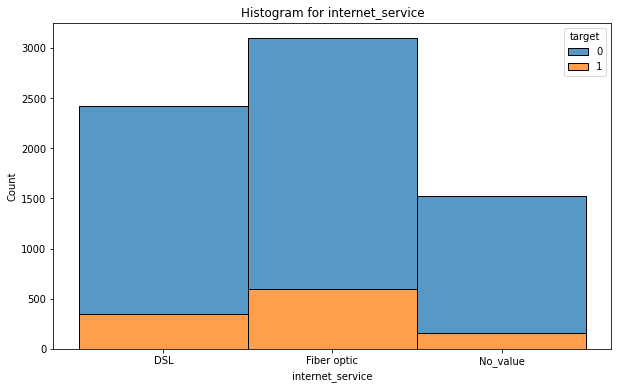

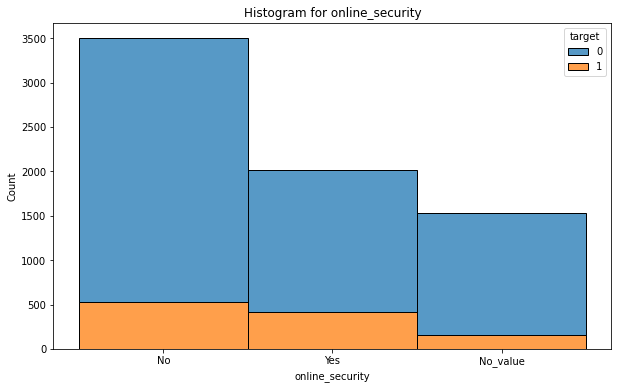

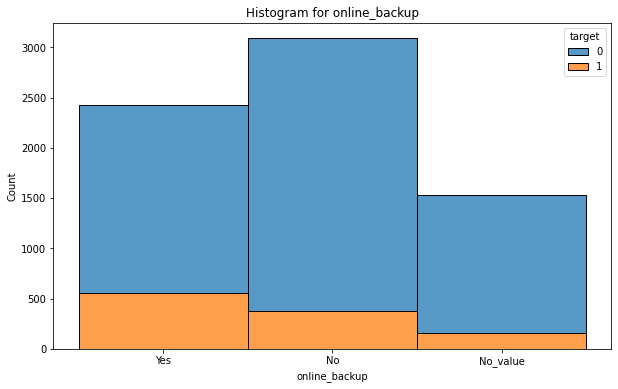

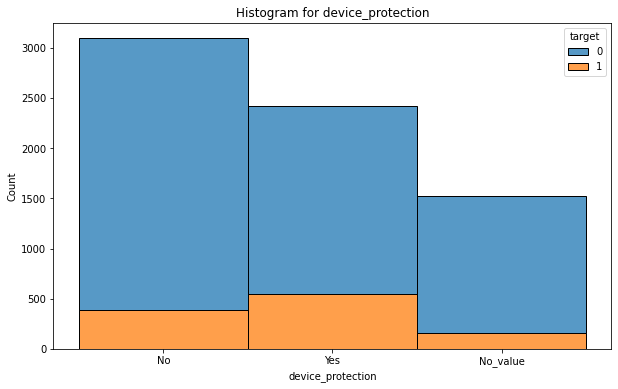

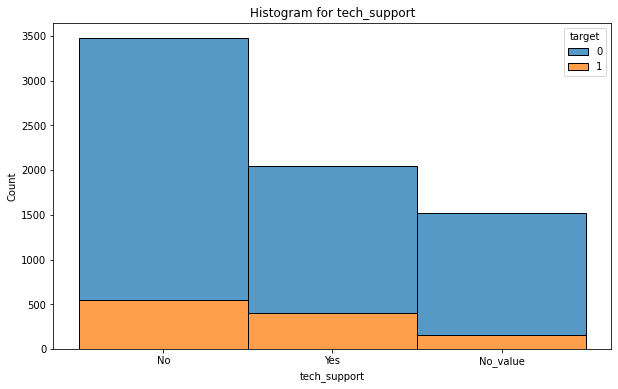

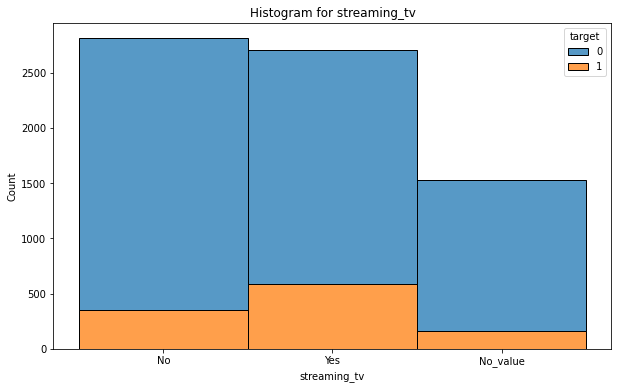

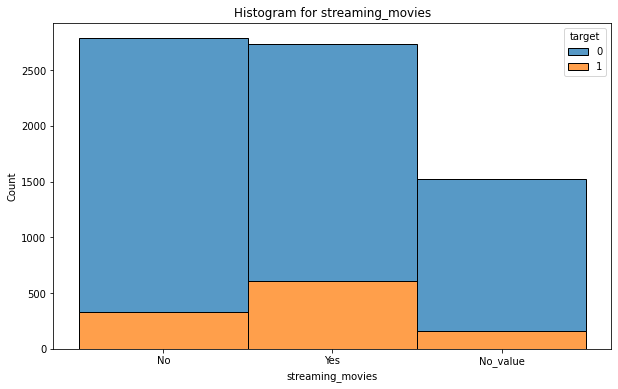

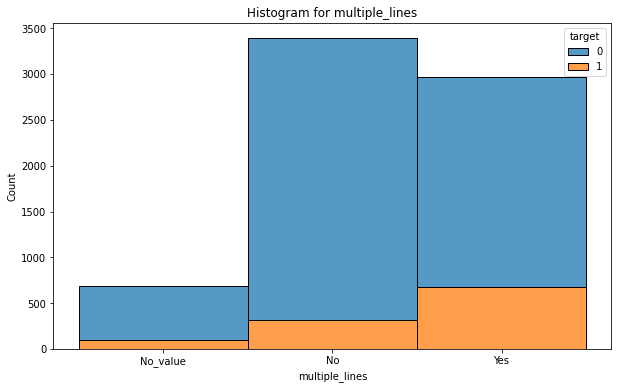

In [75]:
for i in total_data.drop('customer_id', axis=1).columns:
    if i != 'target':  # Исключаем столбец 'target'
        plt.figure(figsize=(10, 6)) 
        sns.histplot(data=total_data, x=i, hue='target', multiple='stack')
        plt.title(f'Histogram for {i}')
        plt.show()

1. "type": наибольшая часть клиентов пользуются ежемесячными платежами.
2. "paperless_billing": клиенты предпочитают пользоваться электронным расчетным листом.
3. "payment_method": с заметным отрывом от остальных типов платежа лтдирует Electronic check.
4. "monthly_charges": большая часть значений скопилась в самом начале графика, это говорит о том, что значительная часть клиентов пользуются минимальным кол-вом услуг, так же возможно, что эти новые клиенты и они еще не успели подключить дополнительные услуги. Второй пик мы можем наблюдать в районе отметки 85 - это клиенты использующие значительную часть представляемых услуг.
5. "total_charges": в суммарных расходах мы так же наблюдаем, что основная масса значений скопилась в начале графика и относительно плавно уменьшается по мере движения к правой его части. После отметки в 6000 мы уже практически не наблюдаем ушедших клиентов. Можно предположить, что клиенты, которые достаточно долго и активно пользуются услугами этой компании ей лояльны.
6. "duration": как и в предыдущих двух признаках, большая часть значений находится в левой части графика и постепенно снижается к его концу. Но мы наблюдаем резкий скачок в предпоследнем столбце, при этом, на графике мы наблюдаем отсутсвие ушедших клиентов в этом столбце. Это так же подтверждает мысль о лояльности старых клиентов. Так же стоит отметить, что большая часть ушедших клиентов приходиться на средние значения длительности.
7. "gender": не наблюдается значительной разницы между полами.
8. "senior_citizen": подавляющая часть клиентов не является пенсионерами, далее дополнительно изучим этот признак.
9. "partner": незначитьльно больше пользователей у которых нет партнера, но заметно больше ушедших клиентов имеют партнера. При этом стоит отметить, что данный признак является крайне нестабильным. Сложно представить себе ситуацию, при которой человек при появлении у него партнера пойдет сообщать об этом в такого рода компанию, эту информацию нужно постоянно актуализировать.
10. "dependents": у большей части клиентов нет детей, так же этот признак требует постоянной актуализации.
11. "internet_service": не все клиенты пользуются интернет услугами, но больше людей отдают предпочтение Fiber optic.
12. "online_security": большая часть пользователей отказались от этой услуги.
13. "online_backup": данную услуга заметно популярнее онлайн защиты, но так же меньше людей воспользовались ей чем отказались.
14. "device_protection": меньше половины клиентов используют эту услугу.
15. "tech_suport": эта услуга так же не пользуются популярностью у клиентов.
16. "streaming_tv": почти половина клиентов пользуются услугами стиминг тв, при этом больше ушло людей, которые воспользовались этой услугой.
17. "streaming_movies": здесь картина крайне похожа на "streaming_tv", скорее всего эти признаки имеют высокую корреляцию друг с другом.
18. "multiple_lines": ненамного меньше половины клиентов воспользовались этой услугой, но мы наблюдаем больше ушедших клиентов среди тех кто как раз ей и воспользовался.

Дополнительно изучим разницу между ушедшими и сохранившимися клиентами. Для этого создадим круговые диаграммы с отражением процента клиентов в зависисти от разных категорий.

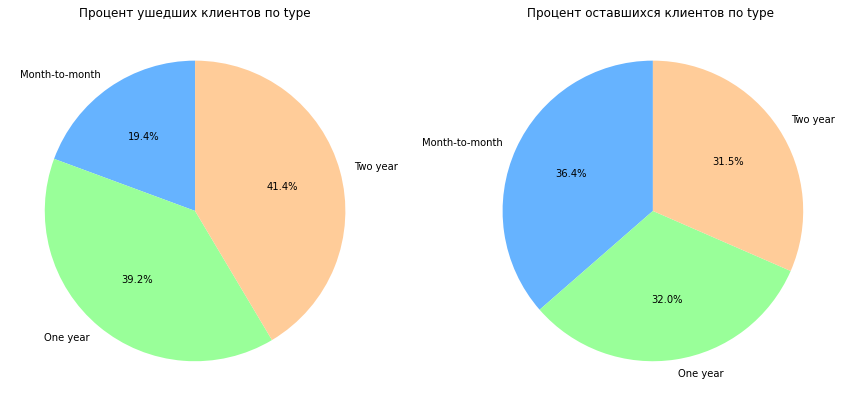

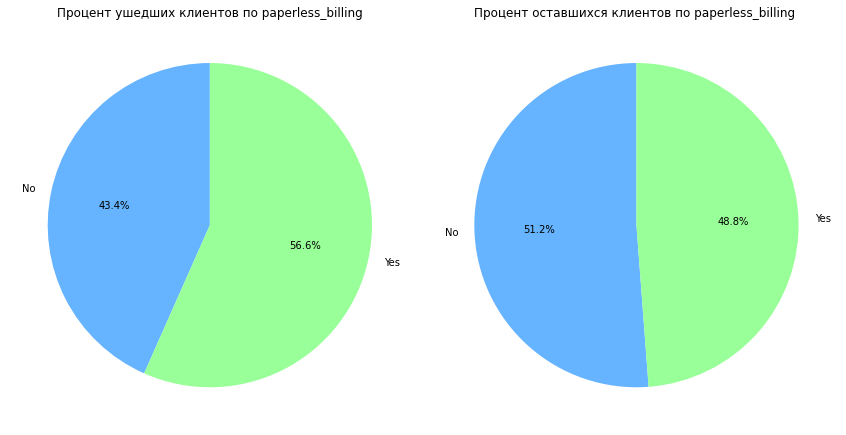

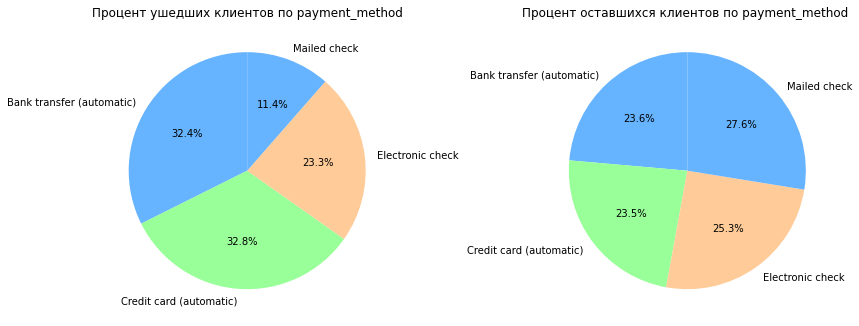

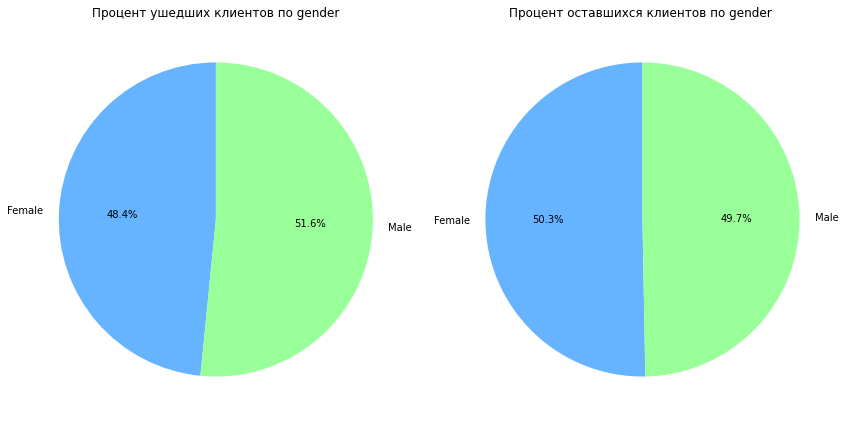

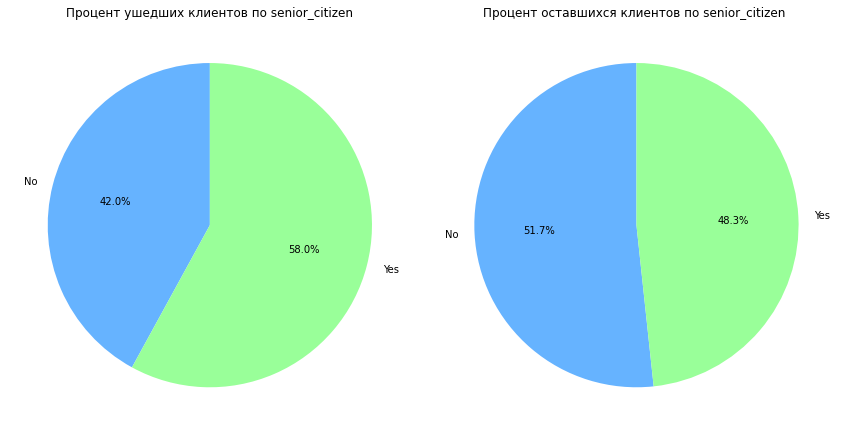

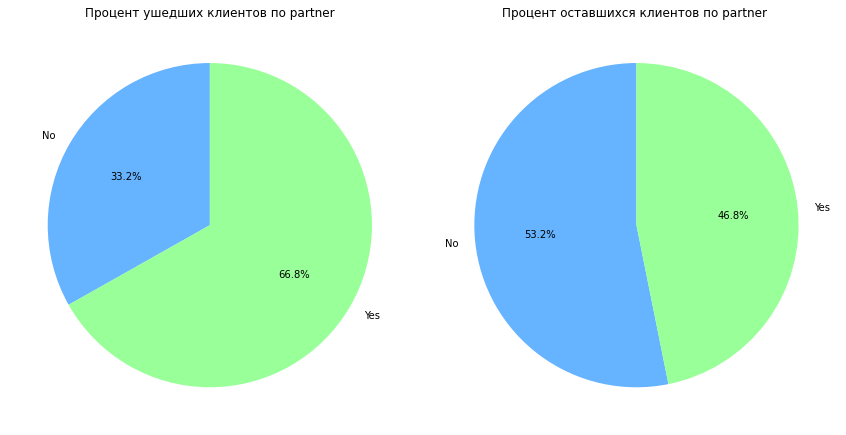

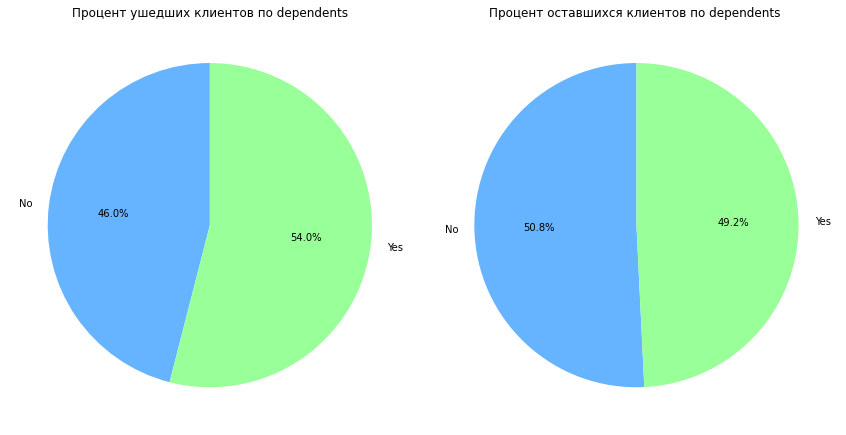

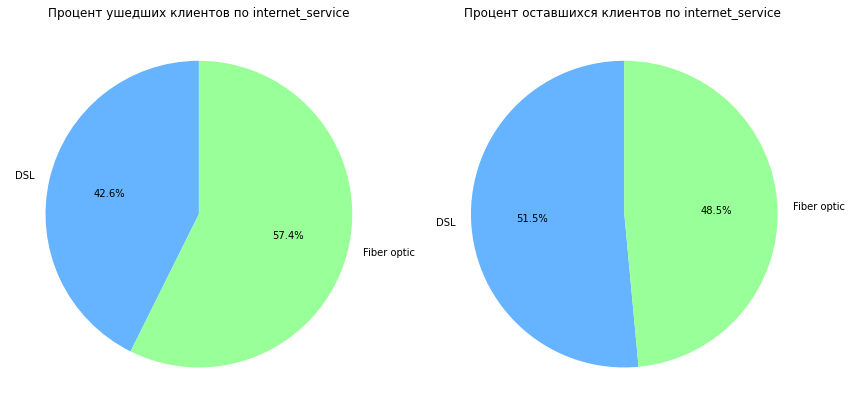

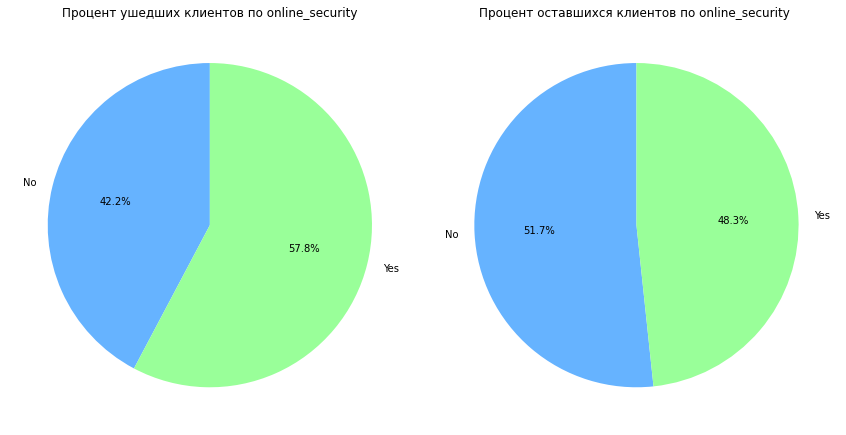

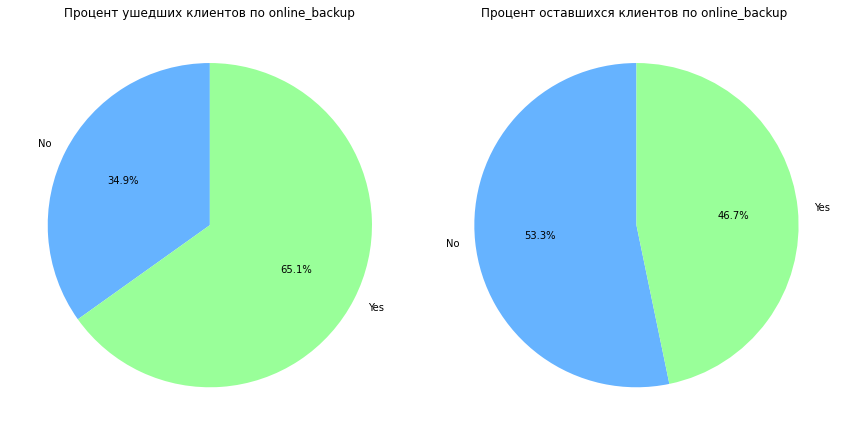

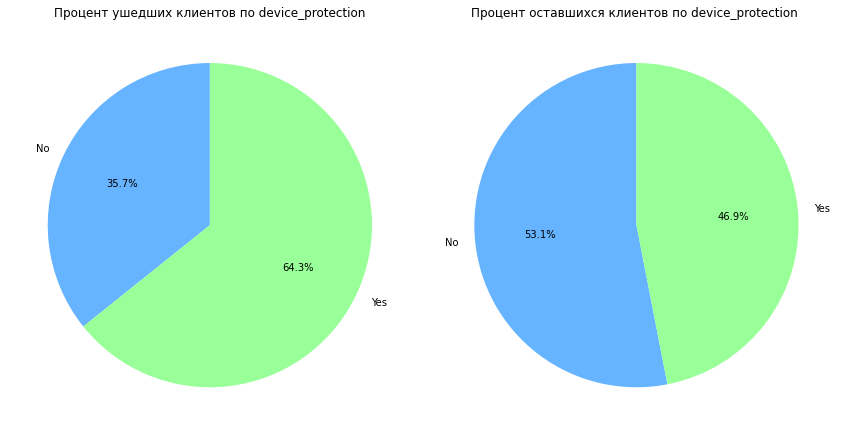

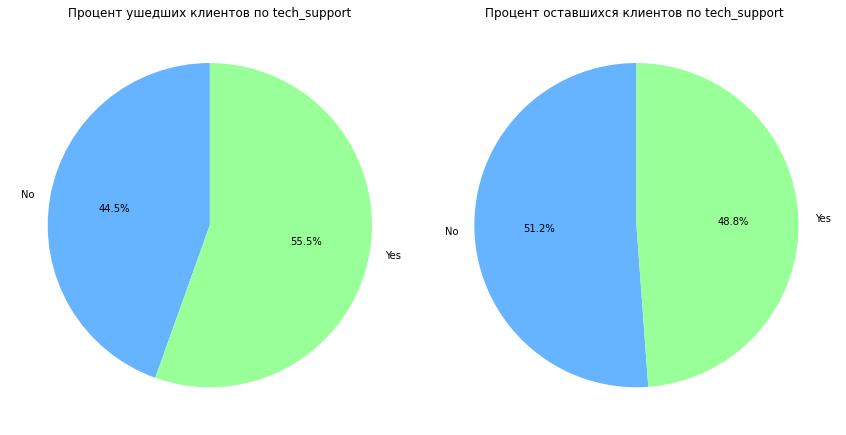

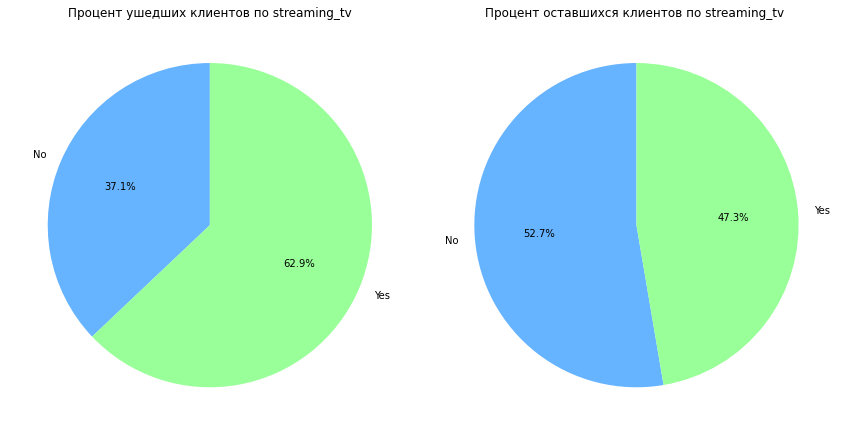

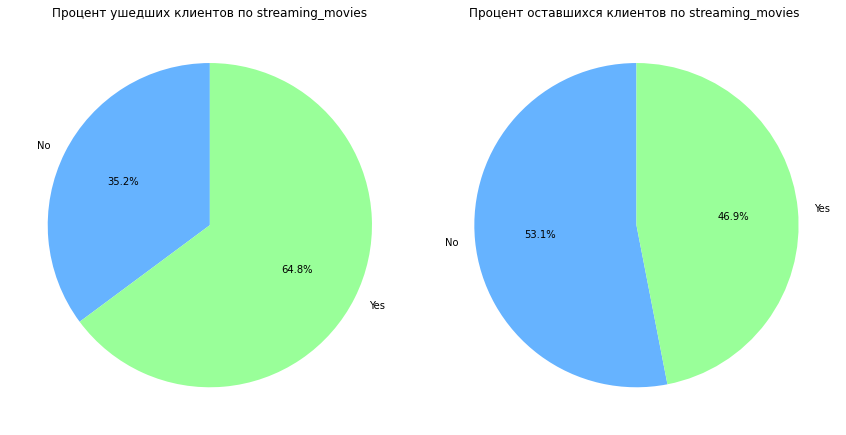

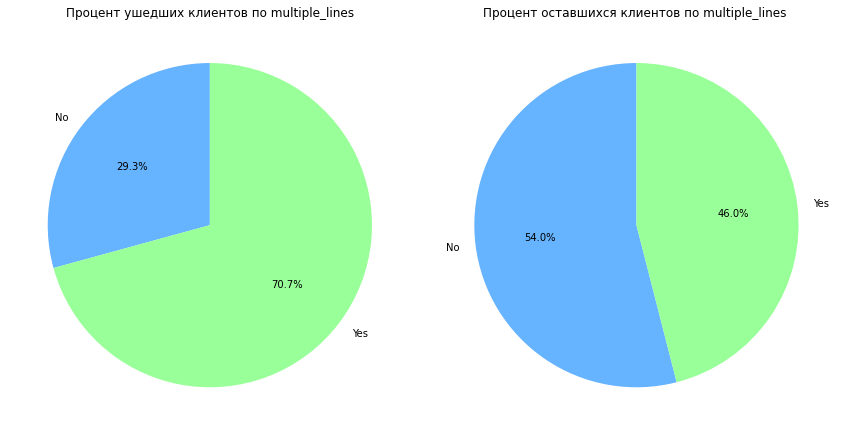

In [76]:
for i in total_data.drop(['customer_id', 'monthly_charges', 'total_charges', 'duration'], axis=1).columns:
    if i != 'target':  # Исключаем столбец 'target'
        a = total_data[total_data[i] != 'No_value'][i] # убираем пустые значения
        
        
        # Создаем две круговые диаграммы рядом друг с другом
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Для категории 1
        ax = axes[0]
        grouped_data1 =  total_data.groupby(a)['target'].value_counts(normalize=True).loc[:, 1] * 100
        ax.pie(grouped_data1, labels=grouped_data1.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
        ax.set_title(f'Процент ушедших клиентов по {i}')
        
        # Для категории 0
        ax = axes[1]
        grouped_data0 =  total_data.groupby(a)['target'].value_counts(normalize=True).loc[:, 0] * 100
        ax.pie(grouped_data0, labels=grouped_data0.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
        ax.set_title(f'Процент оставшихся клиентов по {i} ')
        
        plt.tight_layout()
        plt.show()

1. "type": больше всего ушло клиенов которые использоволи двухлетний контракт - 41.4%, далее идут клиенты с годовой оплатой - 39.2% и меньше всего ушло пользователей, которые платят помесячно - 19.4%. Разница значительная, 80% клиентов, котрые ушли пользовались продолжительными контрактами. При этом, среди оставшихся клиентов 36.4% используют помесячную оплату. Это может быть связанно с плохо продуманым ценообразованием. Так же мы помним, что большая часть людей предпочитают именно помесячную оплату. Компании стоит пересмотреть тарифный план для долгострочной оплаты. Нам не известно о акциях, которые проводятся в компании, скорее всего, они расспространяются на месечные подписки. Клиентам, которые сразу готовы оплатить длительный контракт, должны предоставляться специальные условия, например: значительныя скидка, при долгостройчной оплате; кэшбэк; скидка на продления тарифа; скидки на доп. услуги компании. 
2. "paperless_billing": незначительно больше ушло клиентов, которые предпочитают электронный чек. Для оставшихся наоборот, немного меньше пользуются этой опцией.
3. "payment_method": наибольший процент ушедших клиентов использовали Credit card - 32.8% и Bank transfer - 32.4%, автомотические способы платежа. Далее идет Electronic check - 23.3%, самый популярный способ, затем Mailed check - 11.4%. Сложно сказать с чем именно связанно такое высокое кол-во ушедших клиентов у автоматических категорий - 65% приходиться на них. Возможно клиенты столкнулись с техническими непалатками, сбоями во время использования, например могла списаться некорректная сумма платежа. В любом случае, необходимо изучить этот вопрос более подробно. Осавшиеся клиенты примерно в равной степени пользуются всеми способами.
4. "gender": данный признак не является информативным, он будет исключен.
5. "senior_citizen": процент ушедших клиентов выше у пенсионеров - 58%, но в целом их намного меньше чем более молодых клиентов. Неизвестно есть у компании специальные льготные условия для пенсионеров, но они бы могли улучшить данную ситуацию. Для актуальных пользователей процент пенсионеров меньше на 10%.
6. "partner": наблюдается значительный дисбаланс по соотношению ушедших клиентов для людей с партнером и без. 66.8% людей которые ушли состоят в отношениях. У сохранившихся меньше половины - 46.8%. Причиной может быть более выгодные условя у конкурентов, например сейчас многие компании объединяют в себе услуги по домашнему интернету, тв и сотовой связи, они могут предложить разного рода семейные тарифные планы на свои услуги и поэтому будут более привликательными для семейных пар.
7. "dependents": разница между пользователями с детьми и без них незначительная.
8. "internet_service": немного больше ушедших клиентов среди тех у кого подключение типа Fiber optic - 57.4%. В данном случае сложно сдеалть вывод о причинах такого расспределения. У сохранившихся пользователей в половине случаев это DSL. DSL более старая технология, возможно люди использующие ее более консервативны и в целом менее настроенны что то менять, в том числе и интернет провайдера.
9. "online_security": среди ушедших клиентов 57.8% процентов пользовались данной услугой. Видимо, она не произвела на них достаточно хорошего впечатления, возможно цена на нее завышена. Чуть меньше половины оставшихся клиентов пользуются этой услугой.
10. "online_backup": у 65.1% ушедших пользователей была подключена эта опция. Опять же, невозможно сделать какой то точный вывод о причине происходящего. Можем предположить, что клиенты не нашли эту услугу достаточно хорошей. И только 46.7% актульных клиентов пользуются этим сервисом.
11. "device_protection": ситуация крайне идентична "online_backup".
12. "techsuport": данная опция так же не произвела хорошего впечатления на клиентов, 55.5% ушедших пользователей ее подключали. Опять же, меньше людей пользуются этой услугой сейчас.
13. "streaming_tv": 62.9% разорвавших контракт клиентов пользовались данной опцией. Напрашивается вывод о не высокой привликательности этой услуги. И только 47.3% оставшихся клиентов используют эту услугу.
14. "streaming_movies": как и отмечалось ранее данный сервис очень похож на "streaming_tv".
15. "multiple_lines": у 70.7% ушедших пользователей была подключена данныя услуга. И только 46% людей используют это сейчас. За последние годы стационарная телефонная связь заметно утратила популярность, скорее всего с этим и связан такой высокий показатель в данной категории.

### Вывод по исследовательскому анализу.
1. В наших данных 15.6% клиентов рассторгли контракт. Это является значительным дисбалансом, учтем данную информацию при обучении моделей.
2. Для отбора итогового отбора признаков проведем корреляционный анализ.
3. В целом, можно сказать, что сохранившиеся клиенты более консервативны, они не так активно используют доп услуги, значит они видят преимущества данной компании в другом.

## Корреляционный анализ.

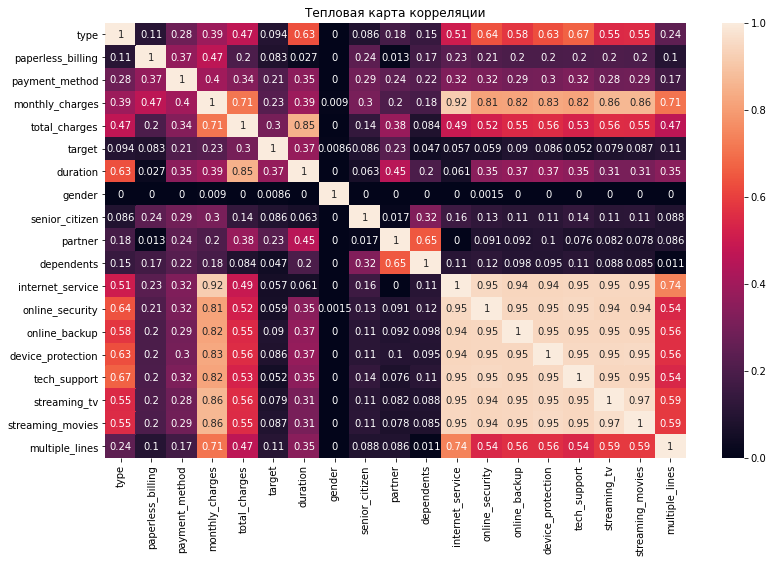

In [77]:
plt.figure(figsize=(13, 8))
sns.heatmap(total_data.drop('customer_id',
                            axis=1).phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'duration']), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

1. Наиболее высокая корреляция у целевого признака с "duration" - 0.37. Это объясняется высокой лояльнстью давних клиентов. Далее идет признак "total_charges" - 0.3, он так же сильно связан с "duration" - 0.85. Логично, что клиенты с высокими суммарными тратами достаточно давно являются клиентами компании. Следом "monthly_charges" с корреляцией в 0.23, котрый имеет высокую зависимость с "total_charges", что тоже легко объяснимо - клиенты месячные траты клиентов во многом будут похожи друг на друга. Признак "partner" имеет такую же корреляцию с целевым - 0.23. Как мы видили ранее, 66.8% ушедших клиентов имели пару. Корреляция с "payment_method" составляет 0.21, что подтверждает мысль о каких-то неудобствах связанных с автоматическими типами оплат. 
2. Все признаки связанные с интернет услугами имеют выраженную мультиколлиниарность, это негативно отразиться на обучении моделей, поэтому возьмем только один из них.
3. Признаки "type", "paperless_billing", "senior_citizen", "multiple_lines" не имеют ярковыраженную корреляцию с целевым, но мы воьмем их для дальнейшего анализа и обучения моделей.

In [78]:
# удаляем ненужные столбцы
total_data = total_data.drop(['gender','dependents','tech_support','streaming_tv','streaming_movies',
                               'online_security','online_backup','device_protection'], axis=1)

Теперь посмотрим на различия в корреляции для оставшихся и ушедших клиентов.

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'target', 'duration']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable target for analysis 1. Dropping this column
  warnings.warn(


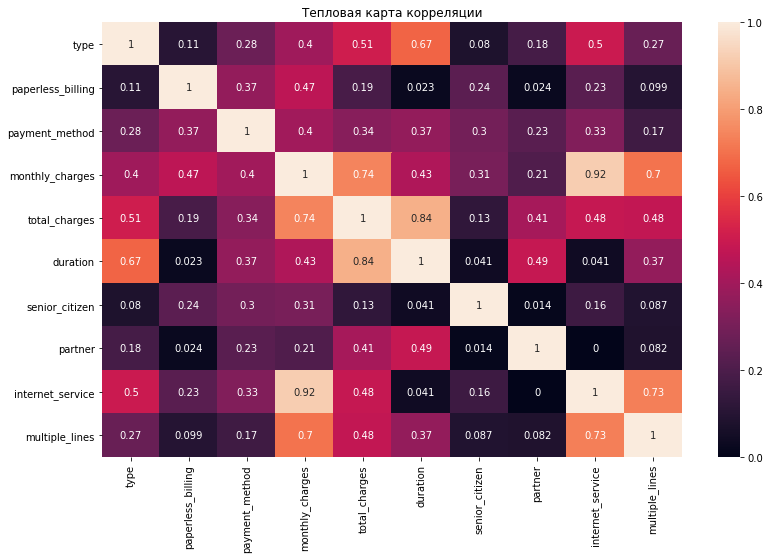

In [79]:
plt.figure(figsize=(13, 8))
sns.heatmap(total_data[total_data['target'] == 0].drop('customer_id',
                                                       axis=1).phik_matrix(),annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'target', 'duration']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable target for analysis 1. Dropping this column
  warnings.warn(


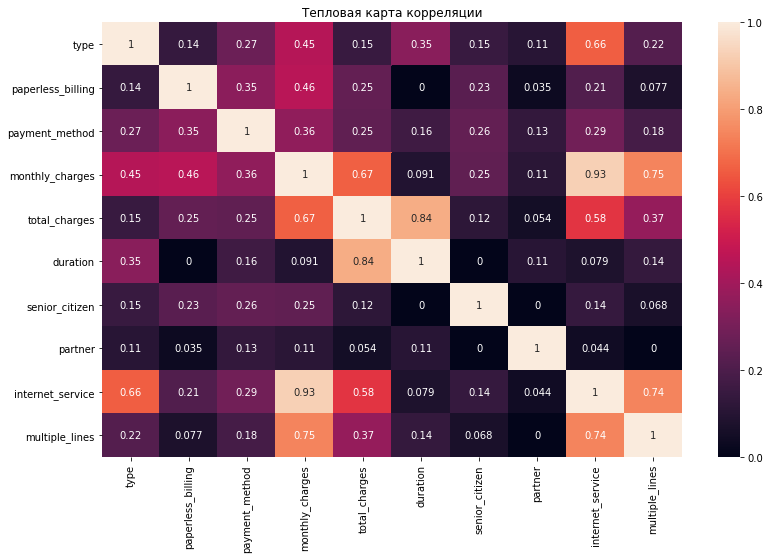

In [80]:
plt.figure(figsize=(13, 8))
sns.heatmap(total_data[total_data['target'] == 1].drop('customer_id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

1. У оставшихся клиентов корреляция между "type" и "duration" - 0.67, заметно выше , чем у тех, кто разорвал контракт - 0.35. Можно предположить, что люди ,неразорвавшие контракт, реже меняют тип оплаты и являются более стабильными клиентами.
2. Для оставшихся клиентов корреляция между наличием партнера и такими признаками как "duration" и "total_charges" - 0.49 и 0.41 против 0.11 и 0.054 соотвественно для тех, кто рассторгли контракт. 
3. Заметная разница и между "duration" и "monthly_charges". Для ушедших клиентов - 0.091, для оставшихся - 0.43. Ежемесячные платежи постоянных клиентов похожи друг на друга и имеют закономерность.

In [81]:
total_data.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target,duration,senior_citizen,partner,internet_service,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,No,Yes,DSL,No_value
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,No,No,DSL,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,No,No,DSL,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,No,No,DSL,No_value
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,No,No,Fiber optic,No


### Вывод по корреляционному анализу:
1. Наиболее высокая корреляция у целевого признака с "duration" - 0.37. Это объясняется высокой лояльнстью давних клиентов. Далее идет признак "total_charges" - 0.3, он так же сильно связан с "duration" - 0.85. Логично, что клиенты с высокими суммарными тратами достаточно давно являются клиентами компании. Следом "monthly_charges" с корреляцией в 0.23, котрый имеет высокую зависимость с "total_charges", что тоже легко объяснимо - клиенты месячные траты клиентов во многом будут похожи друг на друга. Признак "partner" имеет такую же корреляцию с целевым - 0.23. Как мы видили ранее, 66.8% ушедших клиентов имели пару. Корреляция с "payment_method" составляет 0.21, что подтверждает мысль о каких-то неудобствах связанных с автоматическими типами оплат. 
2. Все признаки связанные с интернет услугами имеют выраженную мультиколлиниарность, это негативно отразиться на обучении моделей, поэтому возьмем только один из них.
3. Признаки "type", "paperless_billing", "senior_citizen", "multiple_lines" не имеют ярковыраженную корреляцию с целевым, но мы воьмем их для дальнейшего анализа и обучения моделей.<br>
<br>
В итоговый датасет вошли признаки: type, paperless_billing, payment_method, monthly_charges, total_charges,	target,	duration, senior_citizen, partner, internet_service, multiple_lines.

## Подготовка данных.

Разделим датасет на тестовую и тренировочную выборки, укажем параметр stratify чтобы баланс классов был корректным.

In [82]:
features = total_data.drop(['customer_id', 'target'], axis=1)
target = total_data['target']
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    test_size=.25, 
    stratify=target, 
    random_state=RANDOM_STATE
)

Проверим размерноти выборок после разбиения.

In [58]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(1761, 10)
(5282, 10)
(1761,)
(5282,)


In [83]:
features_train.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,duration,senior_citizen,partner,internet_service,multiple_lines
6135,Two year,Yes,Bank transfer (automatic),114.00,8094.00,2163,No,Yes,Fiber optic,Yes
4660,Month-to-month,No,Mailed check,19.50,78.00,123,No,No,No_value,No
6002,Month-to-month,Yes,Electronic check,82.85,745.65,276,No,Yes,Fiber optic,Yes
5981,Two year,Yes,Mailed check,20.20,767.60,1157,No,Yes,No_value,No
6050,Month-to-month,No,Bank transfer (automatic),99.40,6487.84,1857,No,Yes,Fiber optic,Yes


Списки категориальных и числовых столбцов.

In [84]:
num_columns = ['monthly_charges', 'total_charges', 'duration']
cat_columns = ['type','paperless_billing','payment_method', 'senior_citizen','partner', 'multiple_lines','internet_service']

## Обучение моделей.

Создадим пайплайн включающий в себя предобработку, кодировку данных и саму модель.

In [85]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, cat_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

log_pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced'))
])

### Модель LogisticRegression.

Создадим словарь с потбором гиперпараметров для модели логистической регрессии, далее при помощи случайно поиска найдем лучшие параметры и получим значение метрики "ROC-AUC" на тренировочных данных.

In [86]:
# словарь для модели LogisticRegression()
log_param_grid = [{
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }]

In [87]:
log_random_search = RandomizedSearchCV(
    log_pipe,
    log_param_grid,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    error_score='raise'
)    

In [88]:
log_random_search.fit(features_train, target_train)

# вывод лучшей модели, ее параметров и метрик на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', log_random_search.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', log_random_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type', 'paperless_billing',
                                                   'payment_method',
                                                   'senior_citizen', 'partner',
           

Значение метрики не удовлетворяет условиям нашей задачи.

### Модель RandomForestClassifier.

Далее обучим модель случайного леса, для этого будем использовать тот же пайплайн.

In [89]:
forest_param_grid = [
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'preprocessor__num': ['passthrough'],
        'models__n_estimators': range(50, 301, 30),
        'models__max_depth': range(7,50,1)
    }]

In [90]:
forest_random_search = RandomizedSearchCV(
    log_pipe,
    forest_param_grid,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    error_score='raise'
)    

In [91]:
forest_random_search.fit(features_train, target_train)

# вывод лучшей модели, ее параметров и метрик на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', forest_random_search.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', forest_random_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type', 'paperless_billing',
                                                   'payment_method',
                                                   'senior_citizen', 'partner',
           

Наблюдаем прирост в качестве по сравнению с логистической регрессией, "ROC-AUC" - 0.8201479645582989, но это попрежнему ниже требуемого.

### Модель CatBoostClassifier.

In [92]:
# Подсчитываем количество каждого класса
class_counts = total_data['target'].value_counts()

# Получаем количество положительных классов (класс 1)
positive_class_count = class_counts[1]

# Получаем количество негативных классов (класс 0)
negative_class_count = class_counts[0]

# Рассчитываем отношение числа негативных к числу положительных классов
imbalance_ratio = negative_class_count / positive_class_count

In [93]:
catboost_param_grid = {
    'n_estimators': range(400, 700, 50),
    'max_depth': range(7, 17, 1)
}

In [95]:
cat_search = RandomizedSearchCV(
    estimator=CatBoostClassifier(random_state=RANDOM_STATE,cat_features=cat_columns,
                                scale_pos_weight=imbalance_ratio),
    param_distributions=catboost_param_grid,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    error_score='raise'
)


In [96]:
cat_search.fit(features_train, target_train)

# вывод лучшей модели, ее параметров и метрик на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', cat_search.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', cat_search.best_score_)

Learning rate set to 0.033297
0:	learn: 0.6749291	total: 188ms	remaining: 1m 33s
1:	learn: 0.6667252	total: 191ms	remaining: 47.5s
2:	learn: 0.6555580	total: 203ms	remaining: 33.7s
3:	learn: 0.6409249	total: 338ms	remaining: 41.9s
4:	learn: 0.6279777	total: 451ms	remaining: 44.6s
5:	learn: 0.6127222	total: 571ms	remaining: 47s
6:	learn: 0.5995629	total: 697ms	remaining: 49.1s
7:	learn: 0.5873961	total: 808ms	remaining: 49.7s
8:	learn: 0.5823735	total: 812ms	remaining: 44.3s
9:	learn: 0.5746608	total: 871ms	remaining: 42.7s
10:	learn: 0.5662069	total: 997ms	remaining: 44.3s
11:	learn: 0.5539981	total: 1.12s	remaining: 45.7s
12:	learn: 0.5457066	total: 1.25s	remaining: 46.7s
13:	learn: 0.5405111	total: 1.27s	remaining: 44s
14:	learn: 0.5294827	total: 1.39s	remaining: 45s
15:	learn: 0.5274246	total: 1.39s	remaining: 42.2s
16:	learn: 0.5254819	total: 1.4s	remaining: 39.7s
17:	learn: 0.5223047	total: 1.4s	remaining: 37.5s
18:	learn: 0.5182882	total: 1.42s	remaining: 35.9s
19:	learn: 0.51342

CatBoostClassifier добился требуемой метрики ROC-AUC - 0.8493709009734546 на тренировочной выборке. Именно эту модель будем использовать для теста.

In [98]:
y_test_pred = cat_search.predict_proba(features_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(target_test, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.8970830784289734


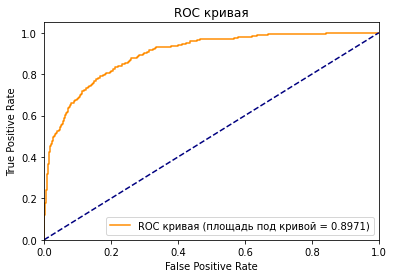

In [99]:
# ROC кривая
fpr, tpr, treshold = roc_curve(target_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.plot(
    fpr, 
    tpr, color='darkorange', 
    label='ROC кривая (площадь под кривой = %0.4f)' % roc_auc
)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc="lower right")
plt.show()

Метрика ROC-AUC на тестовой выборке: 0.8970830784289734, что полностью удовлетваряет условию задачи ROC-AUC > 85.

## Оценка важности признаков.

Сейчас посмотрим какие признаки внесли наибольший вклад.

In [100]:
# Получение лучшей модели из RandomizedSearchCV
best_catboost_model = cat_search.best_estimator_

# Получение важности признаков
feature_importance_df = pd.DataFrame(
    best_catboost_model.feature_importances_,
    index=features_train.columns,
    columns=['Важность признака']
)

feature_importance_df.index = feature_importance_df.index.str.split('__').str[-1]

sorted_feature_importance = feature_importance_df.sort_values(by='Важность признака', ascending=False)

print(sorted_feature_importance)


                   Важность признака
duration                   36.875582
type                       11.105764
total_charges              10.506042
payment_method              8.779060
monthly_charges             8.737695
multiple_lines              8.114257
internet_service            6.963780
partner                     4.408073
paperless_billing           3.306082
senior_citizen              1.203666


### Вывод по оценке признаков:
1. Наиболее важным признаком оказался "duration" - 36.875582, чем дольше человек пользуется услугами компании, тем больше его лояльность к ней.
2. Следущий признак "type" - 11.105764. Тип подписки оказывает важное влияние на решение клиентов.
2. Далее идут два признака -  total_charges(10.506042) и monthly_charges(8.737695). Эти признаки Достаточно сильно связанны друг с другом и с "duration". Их важность легко объяснима, люди, которые являются активными пользователями услуг компании, скорее всего будт продолжать пользоваться ими и дальше, и наоборот для тех чьи траты невилики.
3. Метод оплаты так же вносит свой вклад - 8.779060. Мы наблюдали перекос в сторону автоматических оплат у ушедших клиентов.


# Общий вывод.
**В ходе работы были выполнены следующие шаги:**<br>
<br>
1. Загрузка данных:<br>
1) Во всех таблицах привели названия столбцов к змеиному регистру.<br>
2) Пропуски и дубликаты отсутсвуют.<br>
3) В таблице contract поменяли тип данных на datetime64 для столбца "begin_date", заменили пропуски в столбце "total_charges" на 0 и привели его к типу float, так же создали столбец "target" с целевой переменной на основе столбца "end_date", 0 - клиент остался, 1 - клиент ушел.<br>
<br>
2. Предобработка:<br>
1) Проверили уникальыне значения во всех столбцах всех таблиц, проблем обнаруженно небыло.<br>
2) В таблице contract заменили отсутсвующие значения в столбце "end_date" на актуальную дату информации. Добавили столбец "duration" с длительностью пользования клиентом услугами компании. Для этого вычли из столбца "end_date" столбец "begin_date", затем удалили эти столбцы, чтобы избежать проблем при обучении моделей.<br>
3) В таблице personal в столбце "senior_citizen" заменили значения 0 и 1 на No и Yes соотвественно.<br>
<br>
3. Объединение таблиц:<br>
Таблиц contract и personal одинакового размера, поэтому присоединили одну к другой по столбцу "customer_id". Таблицы phone и internet присоединили к полученной. В итоговой таблице появились пропуски т.к. не все клиенты пользуются интернетом или телефоном, заполнили их хначением 'No_value'.<br>
<br>
4. Исследовательский анализ:<br>
1) В наших данных 15.6% клиентов рассторгли контракт. Это является значительным дисбалансом, учтем данную информацию при обучении моделей.<br>
2) Для отбора итогового отбора признаков проведем корреляционный анализ.<br>
3) В целом, можно сказать, что сохранившиеся клиенты более консервативны, они не так активно используют доп услуги, значит они видят преимущества данной компании в другом.<br>
<br>
5. Корреляционный анализ:<br>
1) Наиболее высокая корреляция у целевого признака с "duration" - 0.37. Это объясняется высокой лояльнстью давних клиентов. Далее идет признак "total_charges" - 0.3, он так же сильно связан с "duration" - 0.85. Логично, что клиенты с высокими суммарными тратами достаточно давно являются клиентами компании. Следом "monthly_charges" с корреляцией в 0.23, котрый имеет высокую зависимость с "total_charges", что тоже легко объяснимо - клиенты месячные траты клиентов во многом будут похожи друг на друга. Признак "partner" имеет такую же корреляцию с целевым - 0.23. Как мы видили ранее, 66.8% ушедших клиентов имели пару. Корреляция с "payment_method" составляет 0.21, что подтверждает мысль о каких-то неудобствах связанных с автоматическими типами оплат. <br>
2) Все признаки связанные с интернет услугами имеют выраженную мультиколлиниарность, это негативно отразиться на обучении моделей, поэтому возьмем только один из них.<br>
3) Признаки "type", "paperless_billing", "seniorcitizen", "multiple_lines" не имеют ярковыраженную корреляцию с целевым, но мы воьмем их для дальнейшего анализа и обучения моделей.<br>
4) В итоговый датасет вошли признаки: type, paperless_billing, payment_method, monthly_charges, total_charges,	target,	duration, senior_citizen, partner, internet_service, multiple_lines.<br>
<br>
6. Подготовка данных:<br>
Разделили датасет на тестовую и тренировочную выборки, указав параметр stratify чтобы баланс классов был корректным.<br>
<br>
7. Обучение моделей:<br>
Для данной задачи обучили три модели классификации - LogisticRegression, RandomForestClassifier и CatBoostClassifier. В качестве метрики использовали метрику ROC-AUC.<br>
1) LogisticRegression. Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.7590407683084738. Метрика оказалась слишком низкой.<br>
2) RandomForestClassifier. Наблюдаем прирост в качестве по сравнению с логистической регрессией, "ROC-AUC" - 0.8201479645582989, но это также ниже требуемого.<br>
3) CatBoostClassifier. CatBoostClassifier добился требуемой метрики ROC-AUC - 0.856141795061295 на тренировочной выборке. Именно эту модель выбрали для прогноза на тестовых данных.<br>
4) Метрика ROC-AUC на тестовой выборке для CatBoostClassifier: 0.9019968187935886, что полностью удовлетваряет условию задачи ROC-AUC > 85.<br>
<br>
8. Оценка важности признаков:<br>
1) Наиболее важным признаком оказался "duration" - 49.893424, чем дольше человек пользуется услугами компании, тем больше его лояльность к ней.<br>
2) Далее идут два признака - monthly_charges(10.575649) и total_charges(8.634497). Эти признаки Достаточно сильно связанны друг с другом и с "duration". Их важность легко объяснима, люди, которые являются активными пользователями услуг компании, скорее всего будт продолжать пользоваться ими и дальше, и наоборот для тех чьи траты невилики.
3) Наличие партнера так же вносит вклад в оценку модели - 3.941044. Уже было отмеченно значительное кол-во ушедших клиентов у которых есть партнер.<br>
4) Призаки с типом оплаты так же имеют высокую важность, 5.666444 для двухгодового контракта и 3.441852 для годового. Как мы видели ранее, пользователи препочитают помесячную оплату.<br>
<br>
Использование модели градиентного бустинга позволило добиться поставленной задачи. Рекомендации для заказчика будут даны ниже.

# EDA.
***Информация, выявленная в ходе исследовательского анализа.***
1. "type": наибольшая часть клиентов пользуются ежемесячными платежами.
2. "paperless_billing": клиенты предпочитают пользоваться электронным расчетным листом.
3. "payment_method": с заметным отрывом от остальных типов платежа лтдирует Electronic check.
4. "monthly_charges": большая часть значений скопилась в самом начале графика, это говорит о том, что значительная часть клиентов пользуются минимальным кол-вом услуг, так же возможно, что эти новые клиенты и они еще не успели подключить дополнительные услуги. Второй пик мы можем наблюдать в районе отметки 85 - это клиенты использующие значительную часть представляемых услуг.
5. "total_charges": в суммарных расходах мы так же наблюдаем, что основная масса значений скопилась в начале графика и относительно плавно уменьшается по мере движения к правой его части. После отметки в 6000 мы уже практически не наблюдаем ушедших клиентов. Можно предположить, что клиенты, которые достаточно долго и активно пользуются услугами этой компании ей лояльны.
6. "duration": как и в предыдущих двух признаках, большая часть значений находится в левой части графика и постепенно снижается к его концу. Но мы наблюдаем резкий скачок в предпоследнем столбце, при этом, на графике мы наблюдаем отсутсвие ушедших клиентов в этом столбце. Это так же подтверждает мысль о лояльности старых клиентов. Так же стоит отметить, что большая часть ушедших клиентов приходиться на средние значения длительности.
7. "gender": не наблюдается значительной разницы между полами.
8. "senior_citizen": подавляющая часть клиентов не является пенсионерами, далее дополнительно изучим этот признак.
9. "partner": незначитьльно больше пользователей у которых нет партнера, но заметно больше ушедших клиентов имеют партнера. При этом стоит отметить, что данный признак является крайне нестабильным. Сложно представить себе ситуацию, при которой человек при появлении у него партнера пойдет сообщать об этом в такого рода компанию, эту информацию нужно постоянно актуализировать.
10. "dependents": у большей части клиентов нет детей, так же этот признак требует постоянной актуализации.
11. "internet_service": не все клиенты пользуются интернет услугами, но больше людей отдают предпочтение Fiber optic.
12. "online_security": большая часть пользователей отказались от этой услуги.
13. "online_backup": данную услуга заметно популярнее онлайн защиты, но так же меньше людей воспользовались ей чем отказались.
14. "device_protection": меньше половины клиентов используют эту услугу.
15. "tech_suport": эта услуга так же не пользуются популярностью у клиентов.
16. "streaming_tv": почти половина клиентов пользуются услугами стиминг тв, при этом больше ушло людей, которые воспользовались этой услугой.
17. "streaming_movies": здесь картина крайне похожа на "streaming_tv", скорее всего эти признаки имеют высокую корреляцию друг с другом.
18. "multiple_lines": ненамного меньше половины клиентов воспользовались этой услугой, но мы наблюдаем больше ушедших клиентов среди тех кто как раз ей и воспользовался.
<br>
1. "type": больше всего ушло клиенов которые использоволи двухлетний контракт - 41.4%, далее идут клиенты с годовой оплатой - 39.2% и меньше всего ушло пользователей, которые платят помесячно - 19.4%. Разница значительная, 80% клиентов, котрые ушли пользовались продолжительными контрактами. При этом, среди оставшихся клиентов 36.4% используют помесячную оплату. Это может быть связанно с плохо продуманым ценообразованием. Так же мы помним, что большая часть людей предпочитают именно помесячную оплату. Компании стоит пересмотреть тарифный план для долгострочной оплаты. Нам не известно о акциях, которые проводятся в компании, скорее всего, они расспространяются на месечные подписки. Клиентам, которые сразу готовы оплатить длительный контракт, должны предоставляться специальные условия, например: значительныя скидка, при долгостройчной оплате; кэшбэк; скидка на продления тарифа; скидки на доп. услуги компании. 
2. "paperless_billing": незначительно больше ушло клиентов, которые предпочитают электронный чек. Для оставшихся наоборот, немного меньше пользуются этой опцией.
3. "payment_method": наибольший процент ушедших клиентов использовали Credit card - 32.8% и Bank transfer - 32.4%, автомотические способы платежа. Далее идет Electronic check - 23.3%, самый популярный способ, затем Mailed check - 11.4%. Сложно сказать с чем именно связанно такое высокое кол-во ушедших клиентов у автоматических категорий - 65% приходиться на них. Возможно клиенты столкнулись с техническими непалатками, сбоями во время использования, например могла списаться некорректная сумма платежа. В любом случае, необходимо изучить этот вопрос более подробно. Осавшиеся клиенты примерно в равной степени пользуются всеми способами.
4. "gender": данный признак не является информативным, он будет исключен.
5. "senior_citizen": процент ушедших клиентов выше у пенсионеров - 58%, но в целом их намного меньше чем более молодых клиентов. Неизвестно есть у компании специальные льготные условия для пенсионеров, но они бы могли улучшить данную ситуацию. Для актуальных пользователей процент пенсионеров меньше на 10%.
6. "partner": наблюдается значительный дисбаланс по соотношению ушедших клиентов для людей с партнером и без. 66.8% людей которые ушли состоят в отношениях. У сохранившихся меньше половины - 46.8%. Причиной может быть более выгодные условя у конкурентов, например сейчас многие компании объединяют в себе услуги по домашнему интернету, тв и сотовой связи, они могут предложить разного рода семейные тарифные планы на свои услуги и поэтому будут более привликательными для семейных пар.
7. "dependents": разница между пользователями с детьми и без них незначительная.
8. "internet_service": немного больше ушедших клиентов среди тех у кого подключение типа Fiber optic - 57.4%. В данном случае сложно сдеалть вывод о причинах такого расспределения. У сохранившихся пользователей в половине случаев это DSL. DSL более старая технология, возможно люди использующие ее более консервативны и в целом менее настроенны что то менять, в том числе и интернет провайдера.
9. "online_security": среди ушедших клиентов 57.8% процентов пользовались данной услугой. Видимо, она не произвела на них достаточно хорошего впечатления, возможно цена на нее завышена. Чуть меньше половины оставшихся клиентов пользуются этой услугой.
10. "online_backup": у 65.1% ушедших пользователей была подключена эта опция. Опять же, невозможно сделать какой то точный вывод о причине происходящего. Можем предположить, что клиенты не нашли эту услугу достаточно хорошей. И только 46.7% актульных клиентов пользуются этим сервисом.
11. "device_protection": ситуация крайне идентична "online_backup".
12. "tech_suport": данная опция так же не произвела хорошего впечатления на клиентов, 55.5% ушедших пользователей ее подключали. Опять же, меньше людей пользуются этой услугой сейчас.
13. "streaming_tv": 62.9% разорвавших контракт клиентов пользовались данной опцией. Напрашивается вывод о не высокой привликательности этой услуги. И только 47.3% оставшихся клиентов используют эту услугу.
14. "streaming_movies": как и отмечалось ранее данный сервис очень похож на "streaming_tv".
15. "multiple_lines": у 70.7% ушедших пользователей была подключена данныя услуга. И только 46% людей используют это сейчас. За последние годы стационарная телефонная связь заметно утратила популярность, скорее всего с этим и связан такой высокий показатель в данной категории.

# Рекомендации для «ТелеДом»:
1. Необходимо соблюдать правильный формат записи данных, у "begi_ndate" и "total_charges" форматы не соотвествуют истенным.
2. Такие признаки как "partner" и "dependents" требуют постоянной актуализации, что затрудняет ич использование для анализа.
3. Стоит рассмотреть добавление такого признака как возраст клиента. Вполне возможно, что разным возрастным группам свойственны различные паттерны.
4. Необхдимо пресмотреть политику компании по отношению к долгосрочным контрактам. Как мы выяснили, они не пользуются популярностью.
5. Так же юыло бы полезно разработать многоуровневую систему лояльности. Она позволит удерживать клиентов за счет создания более привликательных условий.
6. Хочется отметить, что многие услуги компании являются устаревшими - DSL подключение, стационарный телефон. При этом, современные услуги не пользуются популярностью. Это тревожный знак и стоит приложить значительный усилия, чтобы исправить эту ситуацию в ближайшее время.
7. На данный момент на рынке много компаний предоставляют "семейные" комплексы услуг, например сотовая связь для нескольких членов семьи, домашний интернет и тв. Данная категоря пользователей является крайне важной. В контексте этой задаче, не совсем понятно как компания может конкурировть с такого рода предложениями. На данную проблему так же необходимо обрать пристальное внимание.